In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy import interpolate

In [2]:
# w0vec = [-0.7, -1.0, -1.3]
# wavec = [-0.2,0.0,0.2]
w0vec = [-1.0]
wavec = [0.0]

cosmo = {}
for w0 in w0vec:
    for wa in wavec:
        if w0==-1.0 and wa==0.0:
            M='LCDM'
        else:
            M = '('+str(w0)+','+str(wa)+')'
        cosmo[M] = Class()
        cosmo[M].set({'input_verbose':1,'background_verbose':1,'gauge' : 'Newtonian'})
        if M!='LCDM':
            cosmo[M].set({'Omega_Lambda':0.,'w0_fld':w0,'wa_fld':wa})
        cosmo[M].compute()

In [15]:
bg = cosmo['LCDM'].get_background()

a = 1./(bg['z']+1)
H = bg['H [1/Mpc]']
D = bg['gr.fac. D']
f = bg['gr.fac. f']

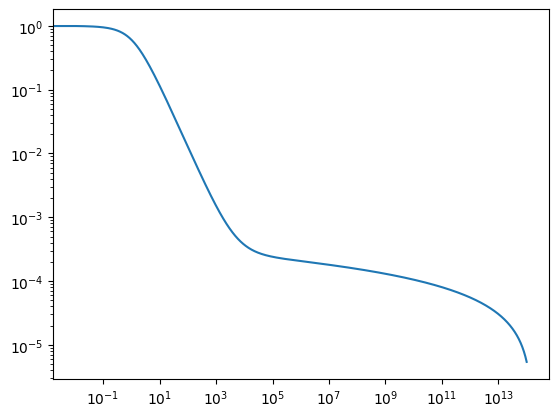

In [27]:
plt.loglog(bg['z'],D)
plt.show()

In [28]:
mpk=np.array([bg['z'],D]).T
np.savetxt('growthfactor.dat',mpk)